In [27]:
#Importing libraries
import pandas as pd
import os
import json
import csv
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import numpy as np

In [28]:
#Importing the generic functions created
import sys
sys.path.append('../src/utils/')
from eda import calculate_mode, plot_attribute_counts_bad_rate_count_type

In [29]:
bad_officer_appointments = '../data/bad_officer_appointments.csv'
good_officer_appointments = '../data/good_officer_appointments.csv'
officer_information_directory = '../data/officer_attribute_store/'

In [30]:
def extract_officer_sector_data(csv_file_path, json_directory, appointment_type):
    officer_appointments = pd.read_csv(csv_file_path)

    unique_officer_numbers = officer_appointments['officer_number'].unique()
    matched_officer_data = []

    for officer_number in unique_officer_numbers:
        json_file_path = os.path.join(json_directory, officer_number + '.json')

        if not os.path.isfile(json_file_path):
            continue

        with open(json_file_path, 'r') as file:
            json_data = json.load(file)

        if 'sector' in json_data and appointment_type in json_data['sector']:
            sectors = json_data['sector'][appointment_type]

            for company_number, sector_info in sectors.items():
                sector_code = sector_info.get('sector_code')
                sector_description = sector_info.get('sector_description')
                sector_group_description = sector_info.get('sector_group_description')

                matched_officer_data.append((officer_number, company_number, sector_code, sector_description, sector_group_description))

    return pd.DataFrame(matched_officer_data, columns=['officer_number', 'company_number', 'sector_code', 'sector_description', 'sector_group_description'])


In [31]:
bad_officer_company_sector_data_other = extract_officer_sector_data(bad_officer_appointments, officer_information_directory, 'other')
good_officer_company_sector_data_other = extract_officer_sector_data(good_officer_appointments, officer_information_directory, 'other')

In [41]:
bad_officer_company_sector_data_other[bad_officer_company_sector_data_other['sector_group_description']=='unknown']

,officer_number,company_number,sector_code,sector_description,sector_group_description
0,3d6e4be8d22ffdd1c5722d30f826270854bf7614,01006630,unknown,unknown,unknown
139,993e327ec787d9b6a87cf28d212be4cd4c564bf8,00077797,unknown,unknown,unknown
192,d8e7a6eef9be36e9a8b395734757e02f2fe16e88,00649192,unknown,unknown,unknown
212,6b1435ba4f628827e9de85a0f0e0d154467fe9e1,01358506,unknown,unknown,unknown
216,d75056747aef772a31d8e2743e5ad4eb7438ecaa,01358506,unknown,unknown,unknown
238,a75bee752bd77e2357b8eaca6b07845057f1e87e,03386832,unknown,unknown,unknown
404,c553c711bdd095f7a88364f77d24e94ca7f6f226,06300306,unknown,unknown,unknown
547,6709f7499a68d7d0125d4162a8c7c7b3ca7bedca,00042342,unknown,unknown,unknown
602,ab7af29851f686f43519b08926355fc5ee46c2c9,01701103,unknown,unknown,unknown
693,82d5029f75847c7541b425404a5762203830740f,02164270,unknown,unknown,unknown


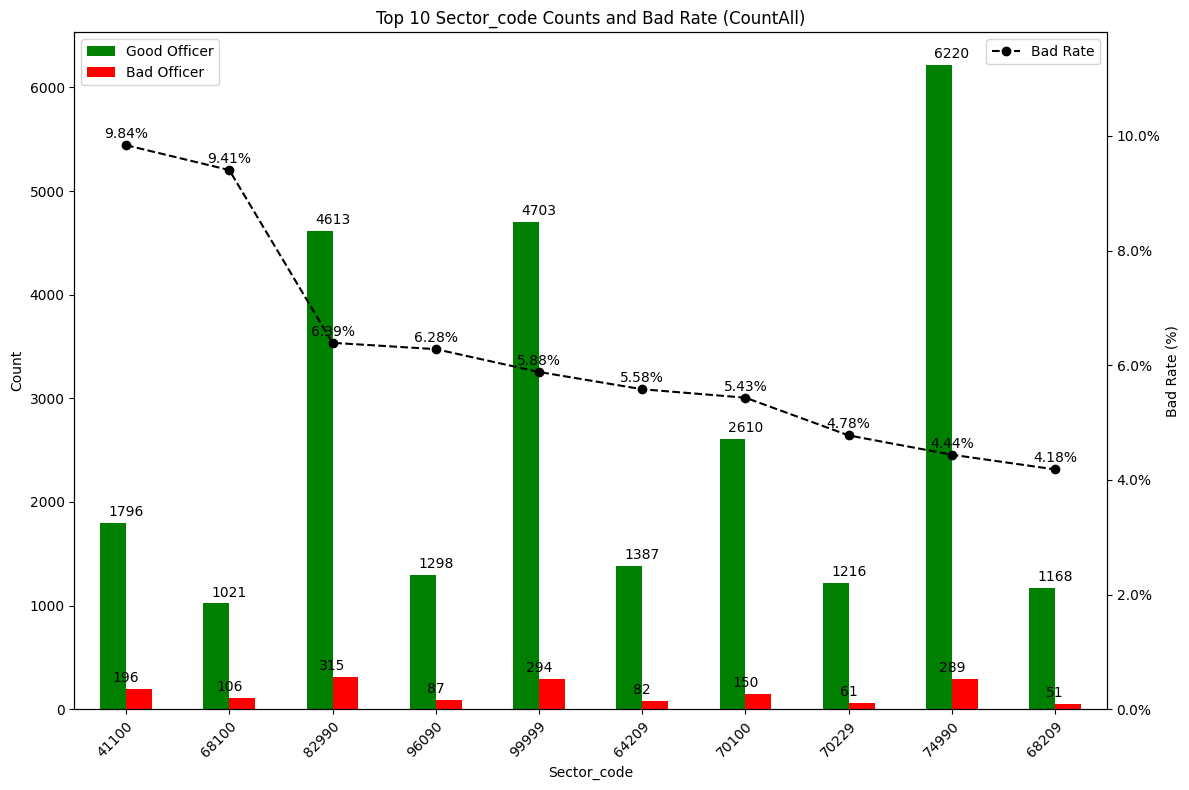

In [6]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_code', count_type='count_all')



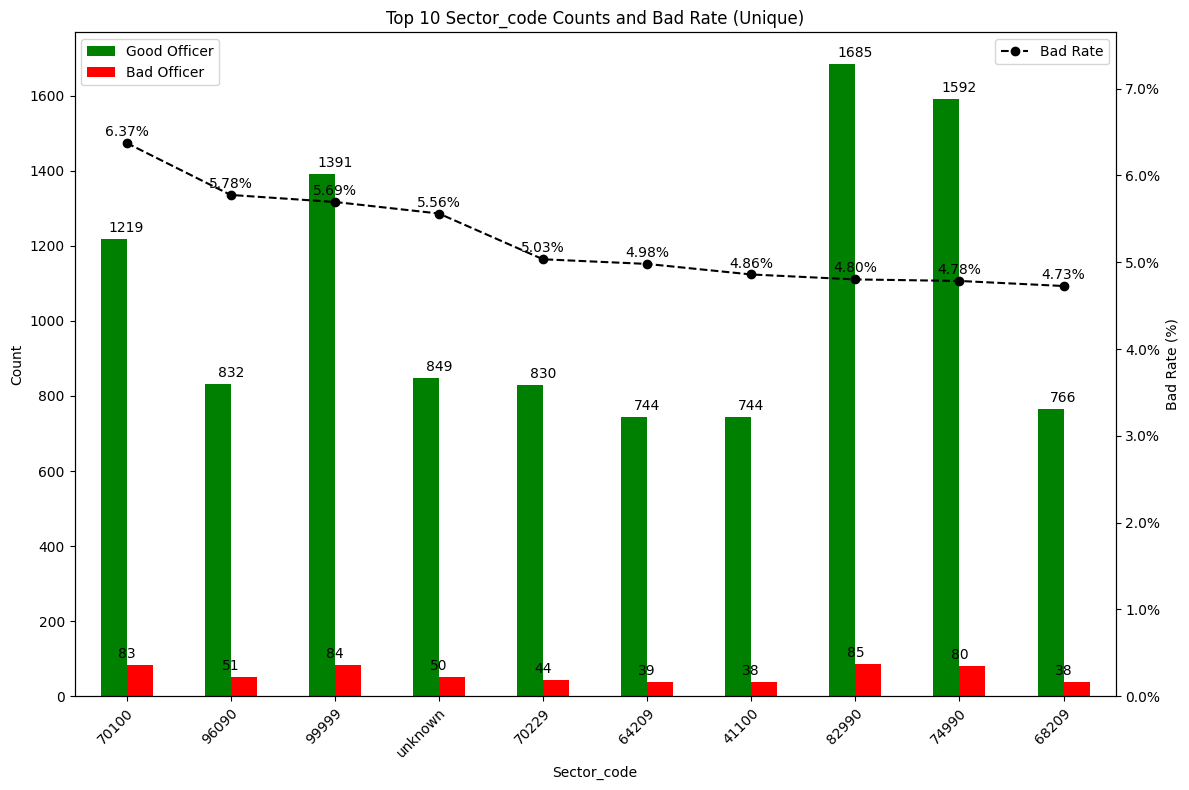

In [7]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_code', count_type='unique')



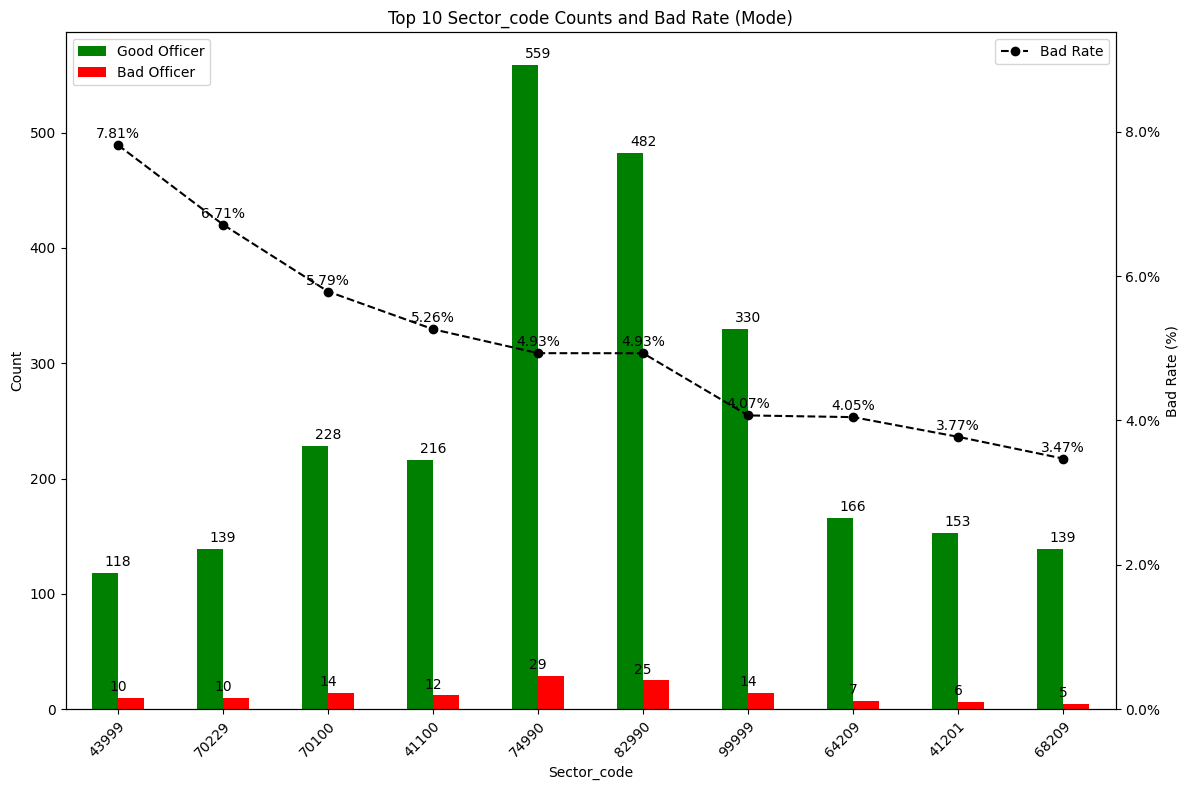

In [8]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_code', count_type='mode')



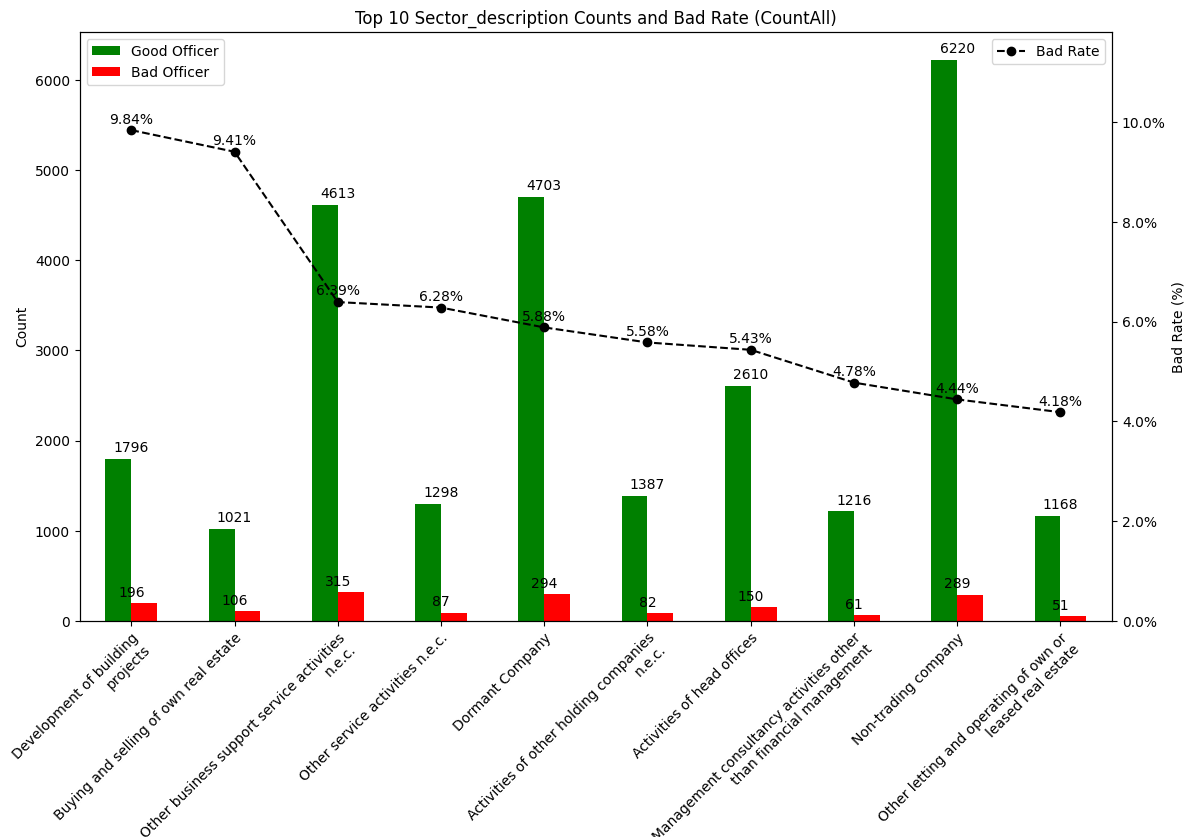

In [9]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_description', count_type='count_all')



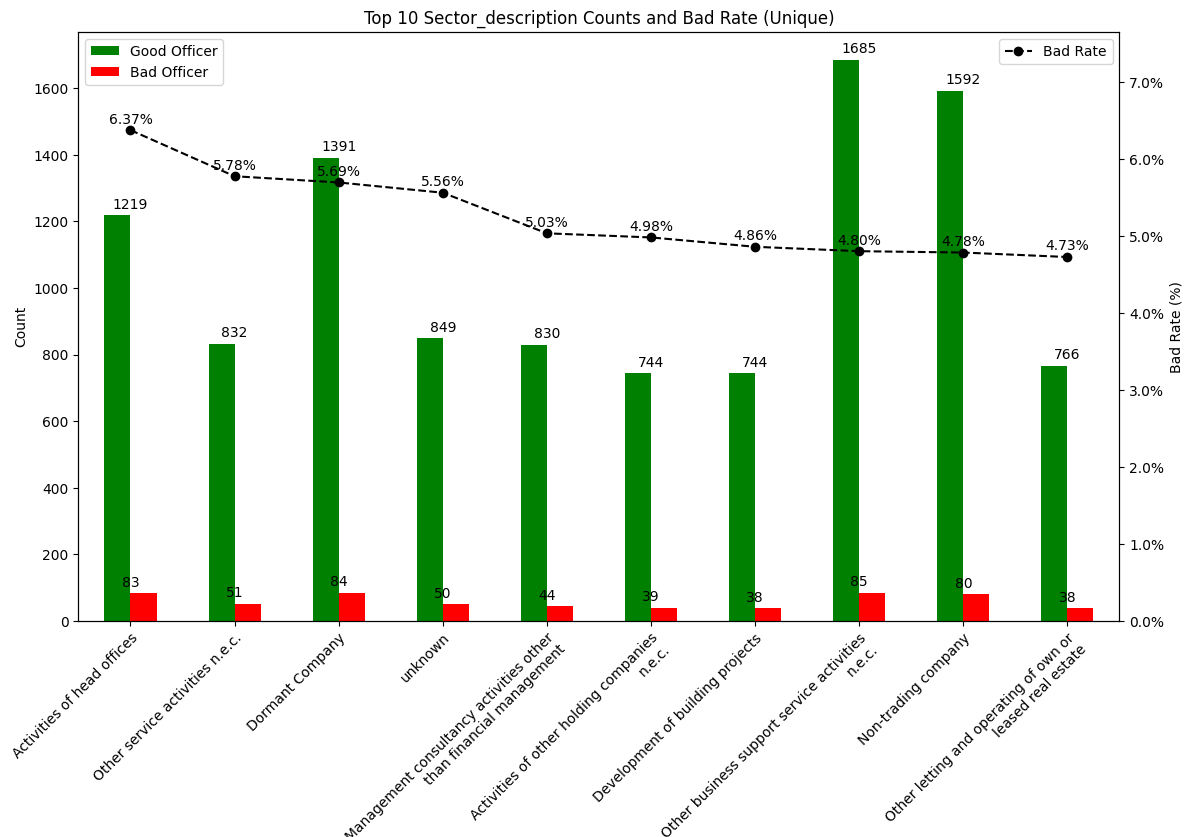

In [10]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_description', count_type='unique')



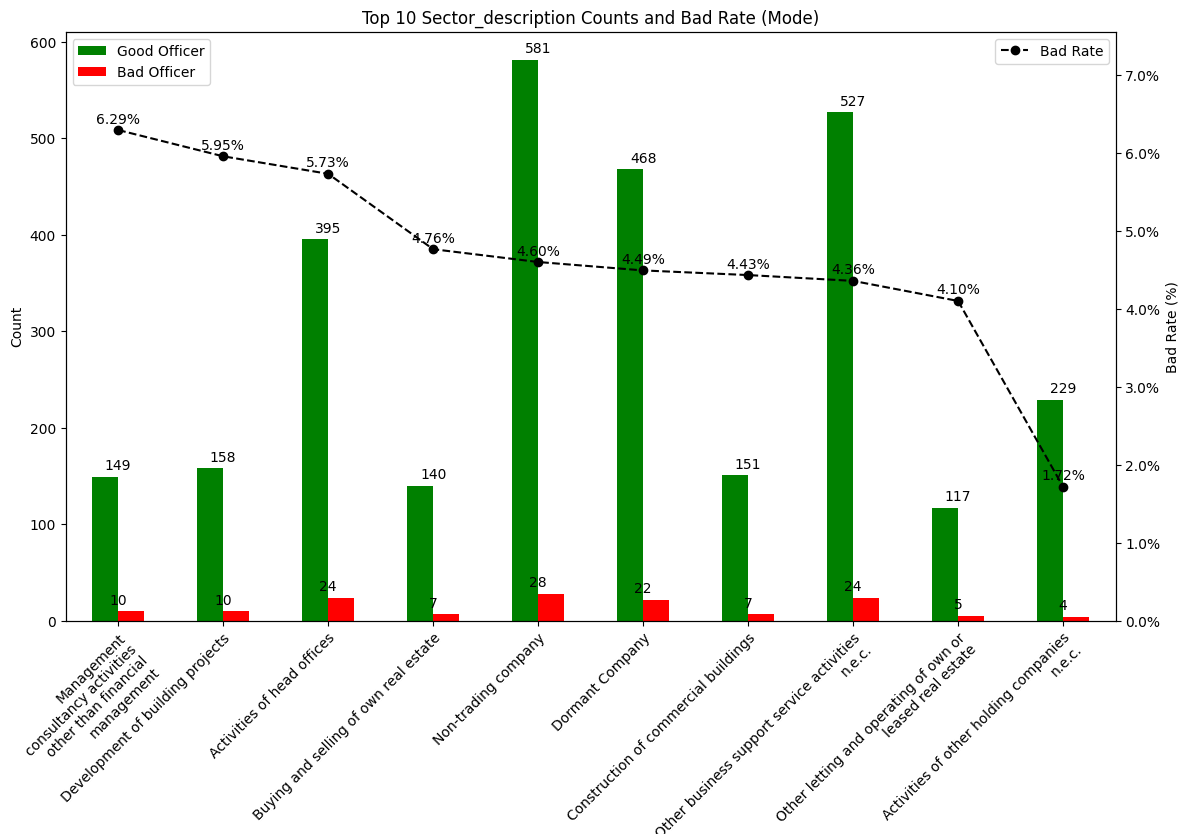

In [11]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_description', count_type='mode')



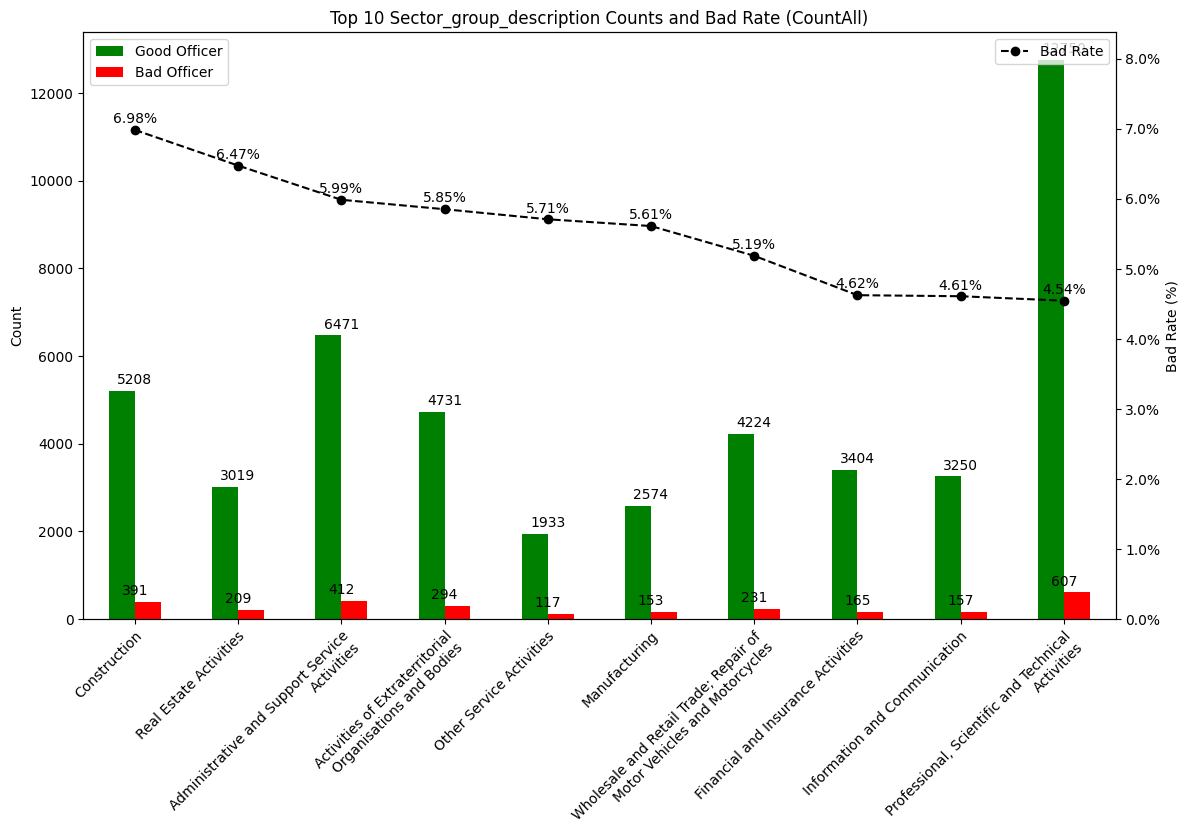

In [12]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_group_description', count_type='count_all')



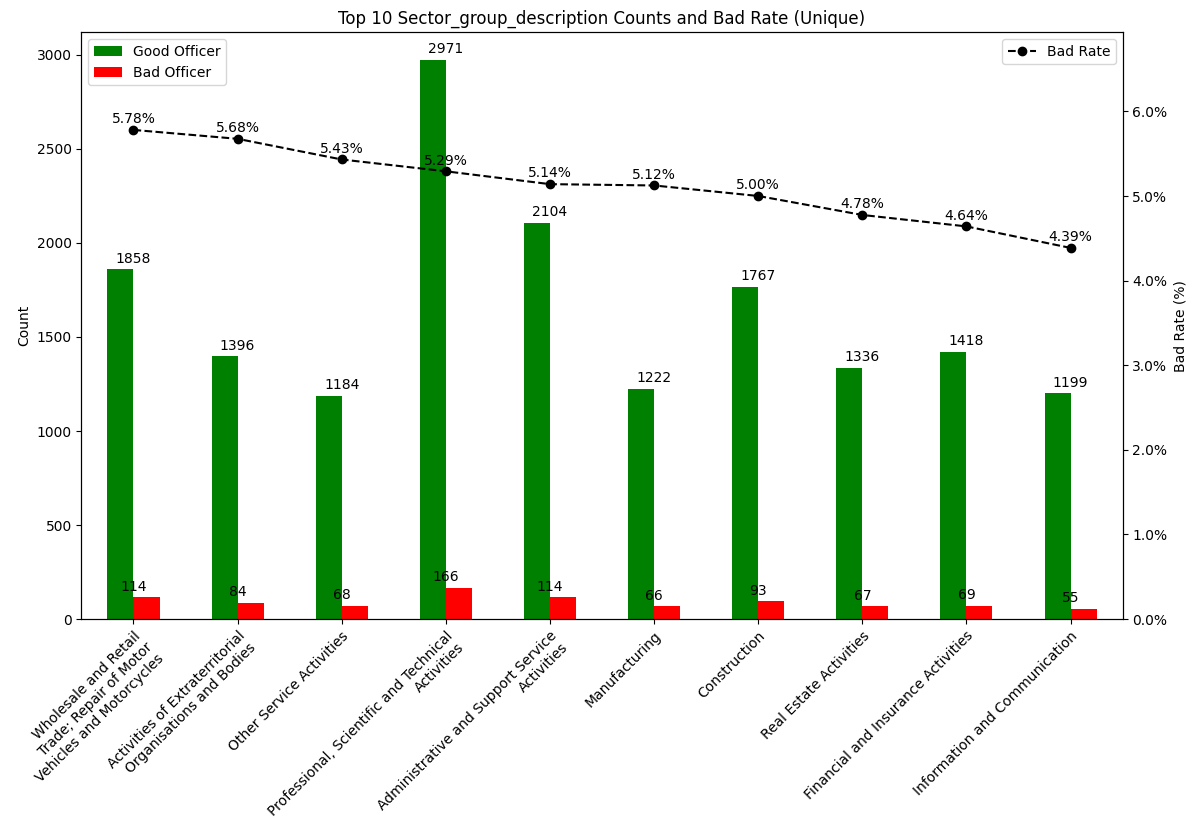

In [13]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_group_description', count_type='unique')



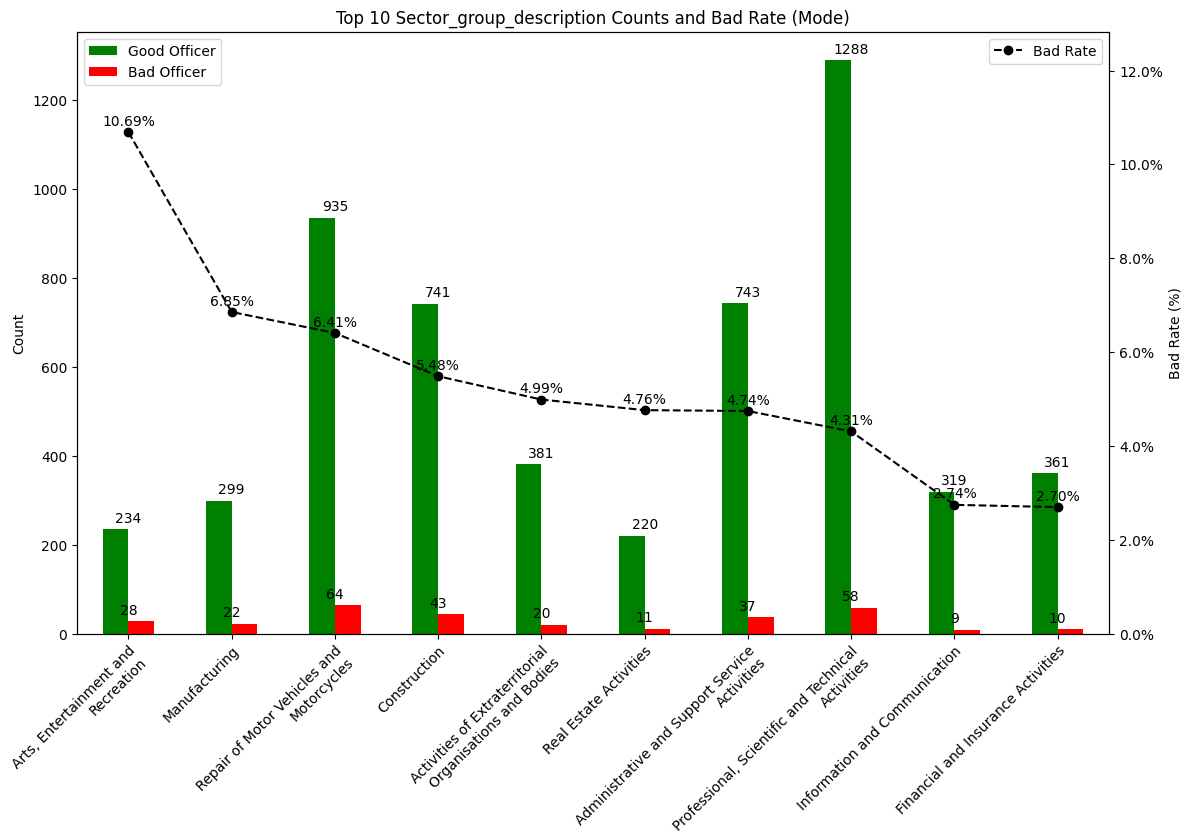

In [14]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_group_description', count_type='mode')



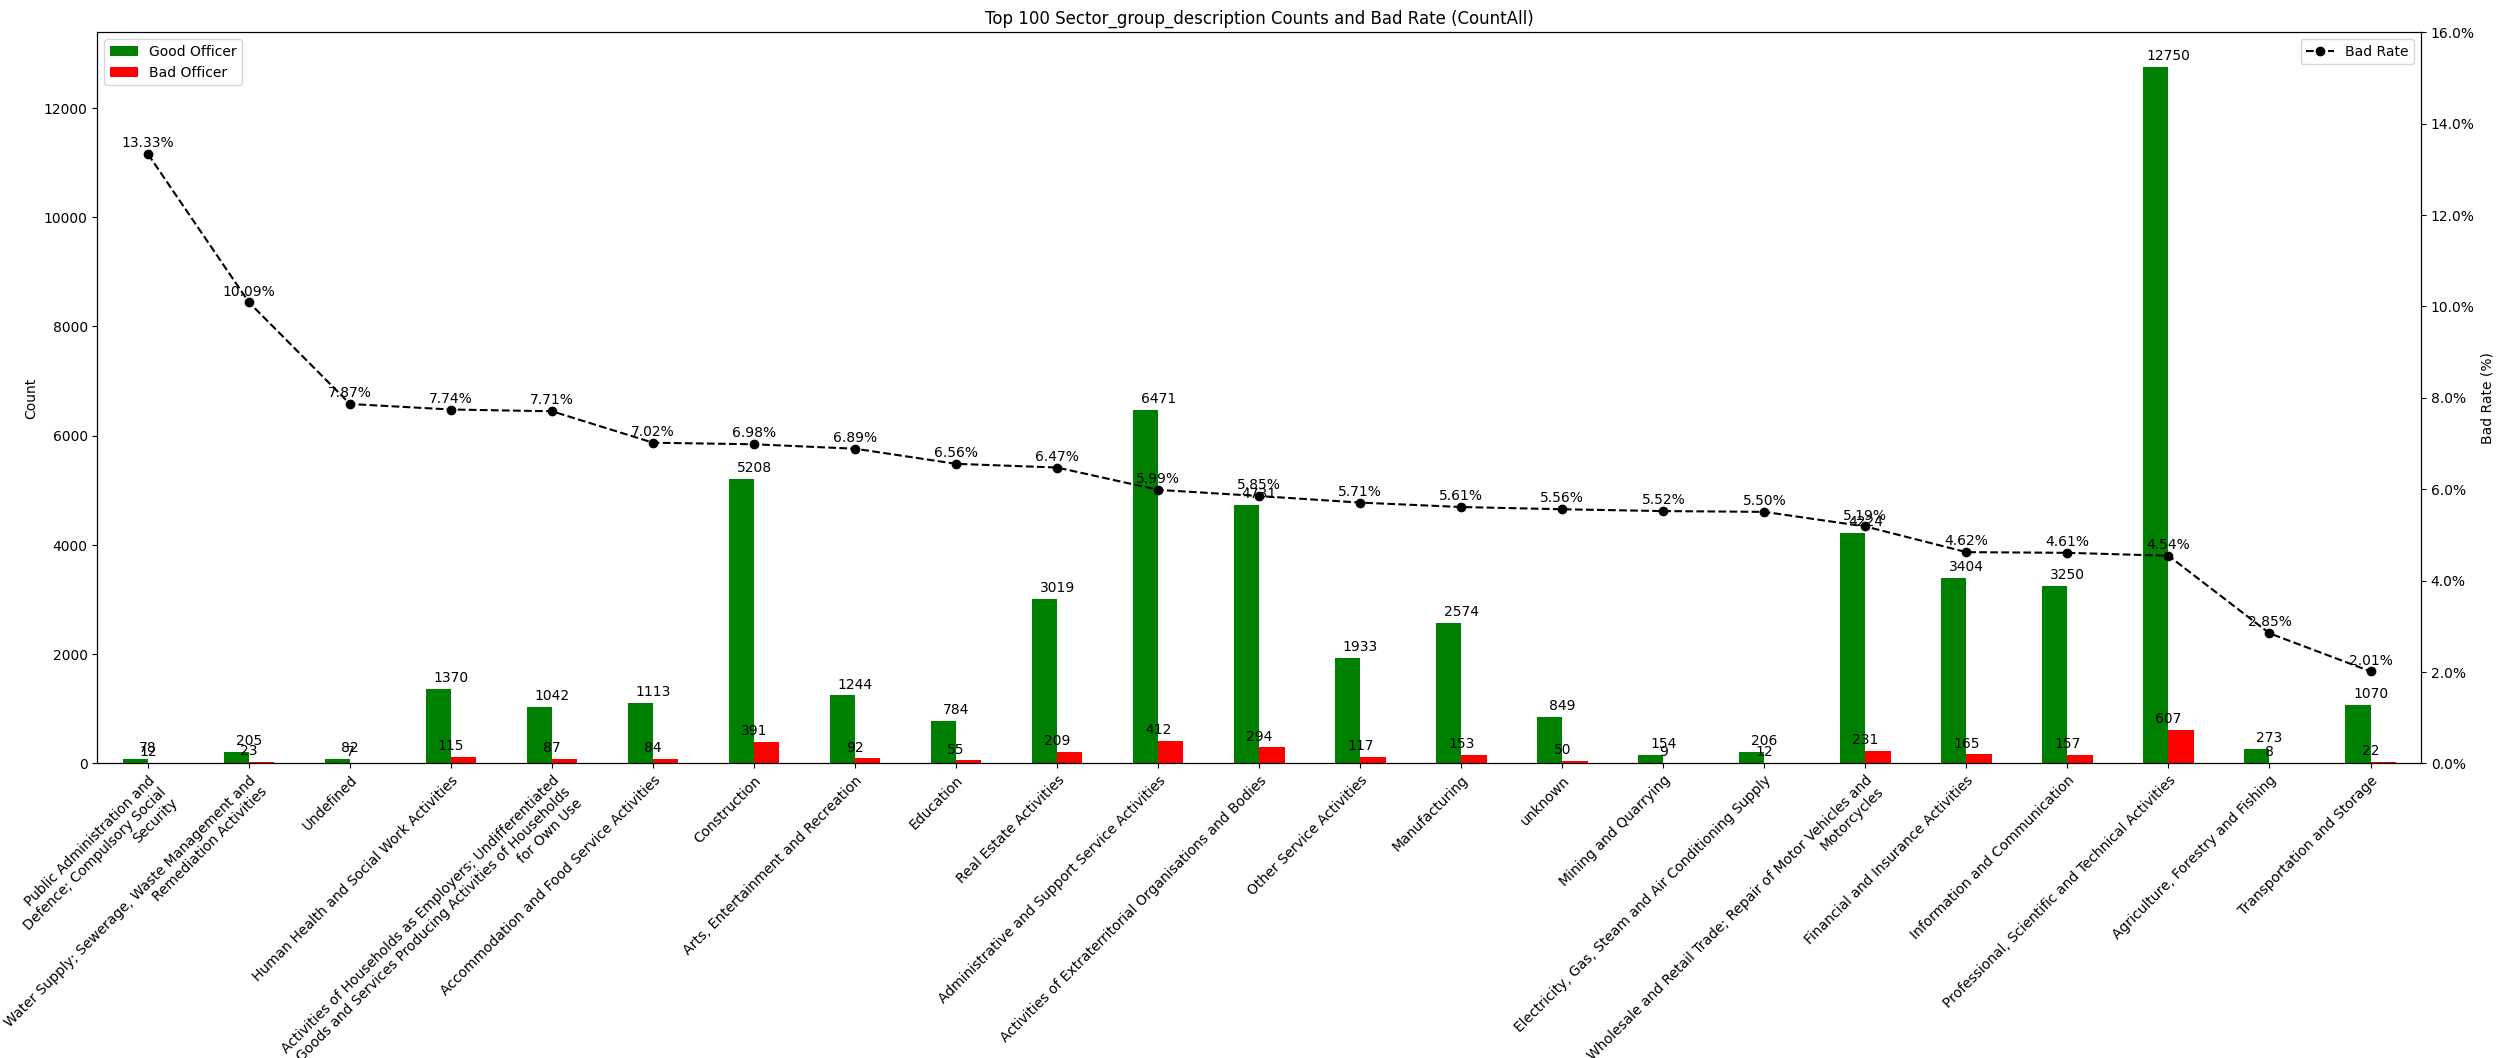

In [6]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_group_description', count_type='count_all', fig_length=25, fig_width=10, top_num_values = 100)



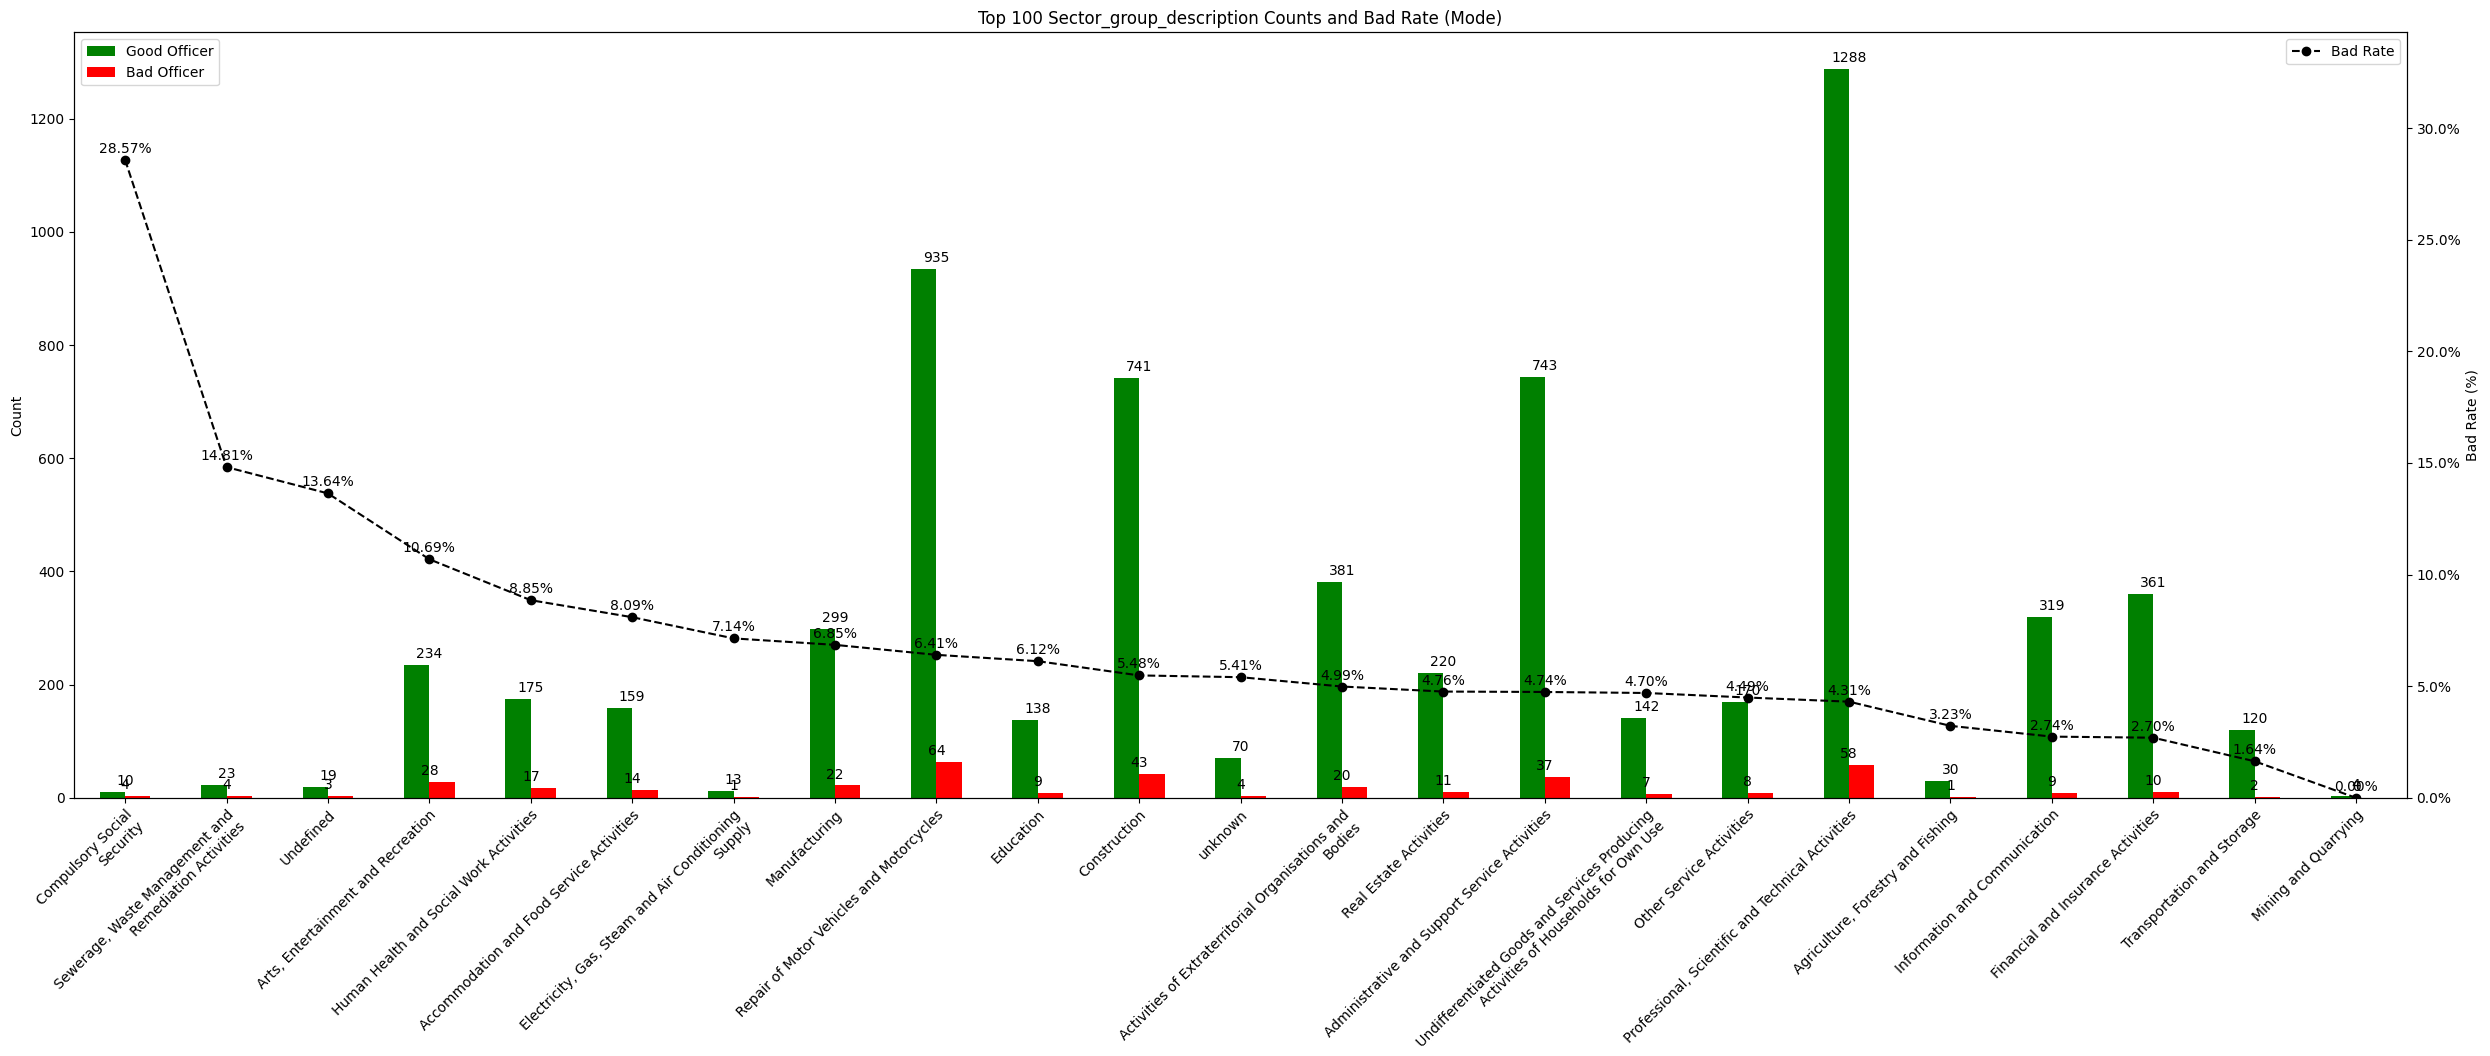

In [8]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_group_description', count_type='mode', fig_length=25, fig_width=10, top_num_values = 100)



In [9]:
bad_officer_company_sector_data_current = extract_officer_sector_data(bad_officer_appointments, officer_information_directory, 'current')
good_officer_company_sector_data_current = extract_officer_sector_data(good_officer_appointments, officer_information_directory, 'current')

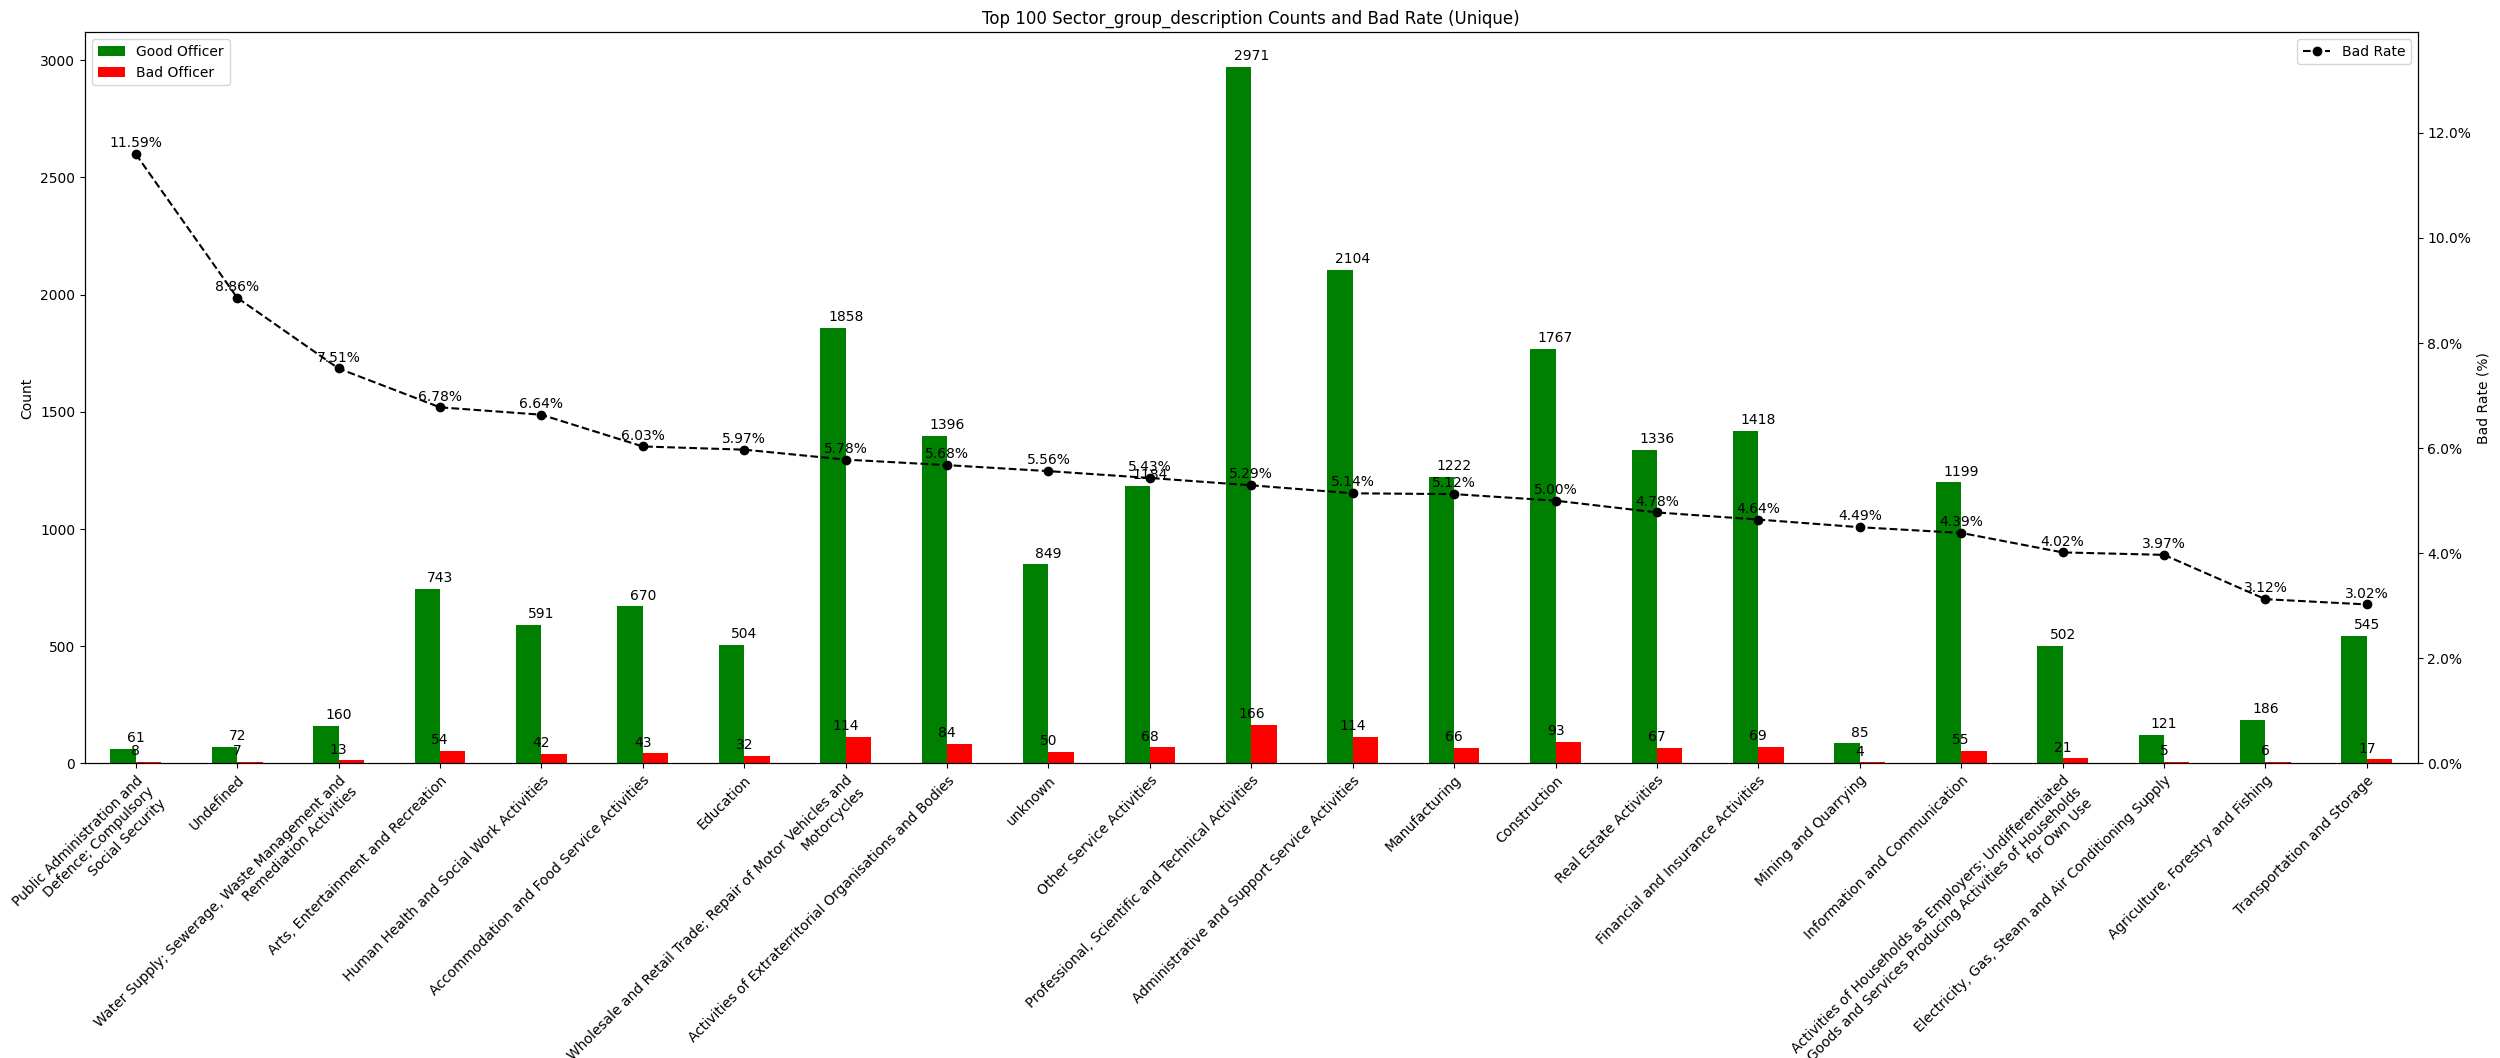

In [7]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_other, bad_officer_company_sector_data_other, 'sector_group_description', count_type='unique', fig_length=25, fig_width=10, top_num_values = 100)



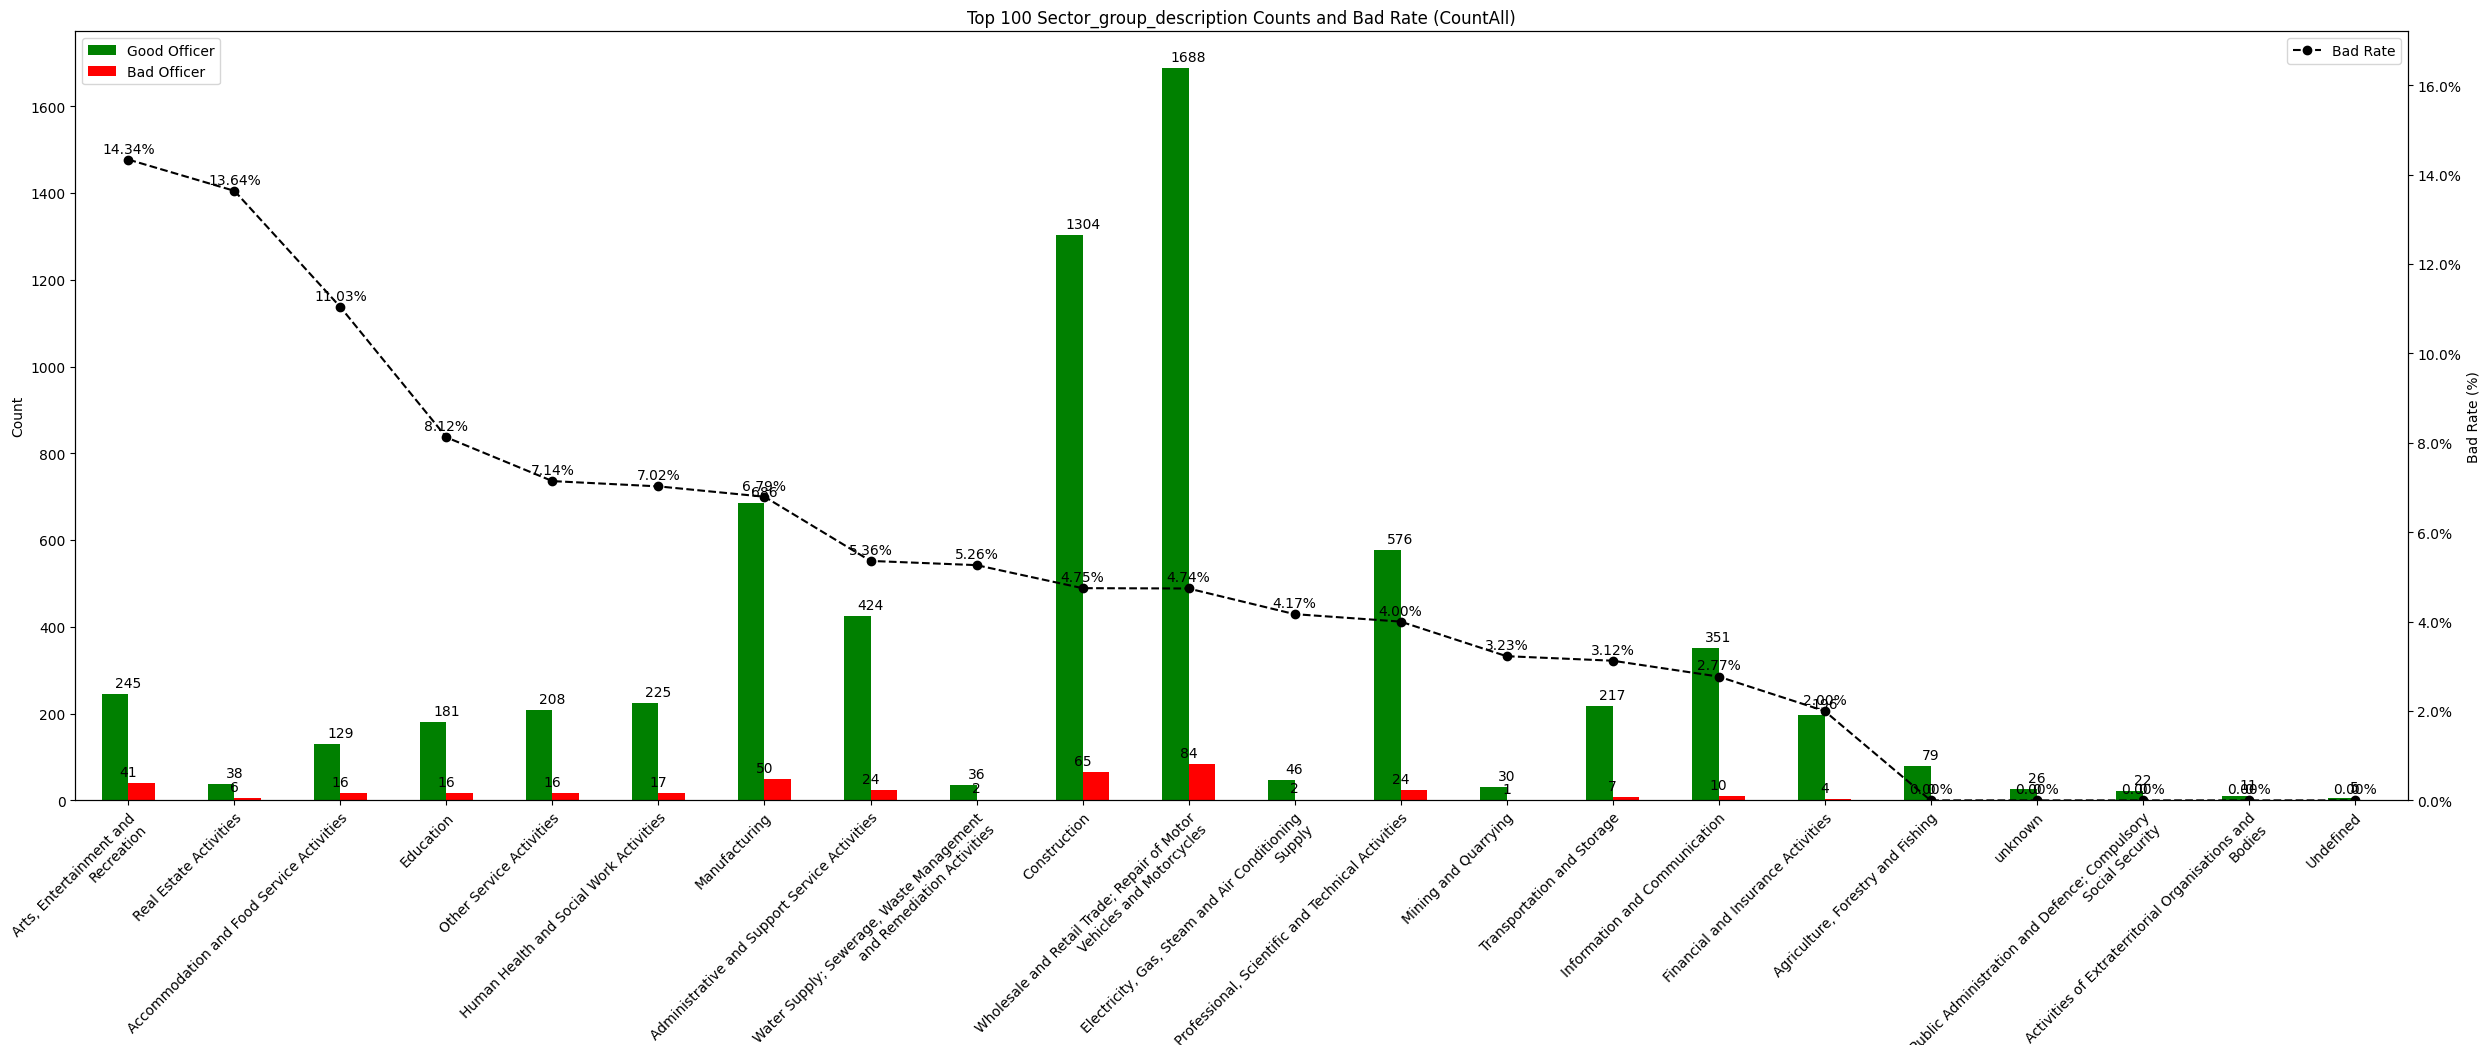

In [16]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_sector_data_current, bad_officer_company_sector_data_current, 'sector_group_description', count_type='count_all', fig_length=25, fig_width=10, top_num_values = 100)



In [1]:
#plot somehting